# Cargar Datos

In [2]:
import pandas as pd

# Ruta al archivo
ruta = 'dataset/stocks/TWTR.csv'

# Cargar el dataset
df = pd.read_csv(ruta)

# Convertir la columna de fecha a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna de fecha como índice
df.set_index('Date', inplace=True)

# Establecer la frecuencia del índice
df = df.asfreq('ME') # D: Diario, ME: Mensual, YE: Anual

# Comprobar valores nulos
print(df.isnull().sum())

# Rellenar valores nulos si existen (interpolación)
if df.isnull().sum().sum() > 0:
    df.interpolate(method='linear', inplace=True) # linear, pchip...

    # Visualizar valores nulos
    print(df.isnull().sum())

df = df.dropna()

# Visualizar el dataset
print(df.head())

Open         23
High         23
Low          23
Close        23
Adj Close    23
Volume       23
dtype: int64
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64
                 Open       High        Low      Close  Adj Close      Volume
Date                                                                         
2013-12-31  62.360001  65.220001  61.650002  63.650002  63.650002  27814600.0
2014-01-31  63.389999  65.370003  62.650002  64.500000  64.500000  15498800.0
2014-02-28  55.930000  56.000000  54.130001  54.910000  54.910000   8137200.0
2014-03-31  47.549999  47.750000  46.430000  46.669998  46.669998   5794500.0
2014-04-30  37.660000  38.980000  37.240002  38.970001  38.970001  38397900.0


# Modelo AR

In [46]:
# Dividir el dataset
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

y_train = train_data['Close']
y_test = test_data['Close']

In [90]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(y_train,lags=20)
model_fit = model.fit()
print(f'Coefficients:\n{model_fit.params}')

Coefficients:
const        3.565016
Close.L1     0.852767
Close.L2     0.069823
Close.L3     0.190150
Close.L4    -0.124297
Close.L5    -0.016688
Close.L6    -0.083956
Close.L7     0.104375
Close.L8     0.108047
Close.L9    -0.216675
Close.L10   -0.037267
Close.L11   -0.094299
Close.L12    0.014540
Close.L13    0.142837
Close.L14   -0.097601
Close.L15    0.250630
Close.L16   -0.157378
Close.L17   -0.016025
Close.L18    0.256414
Close.L19   -0.253299
Close.L20   -0.023898
dtype: float64


In [91]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Realizar predicciones
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Calcular MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 5.60
Root Mean Squared Error: 7.04


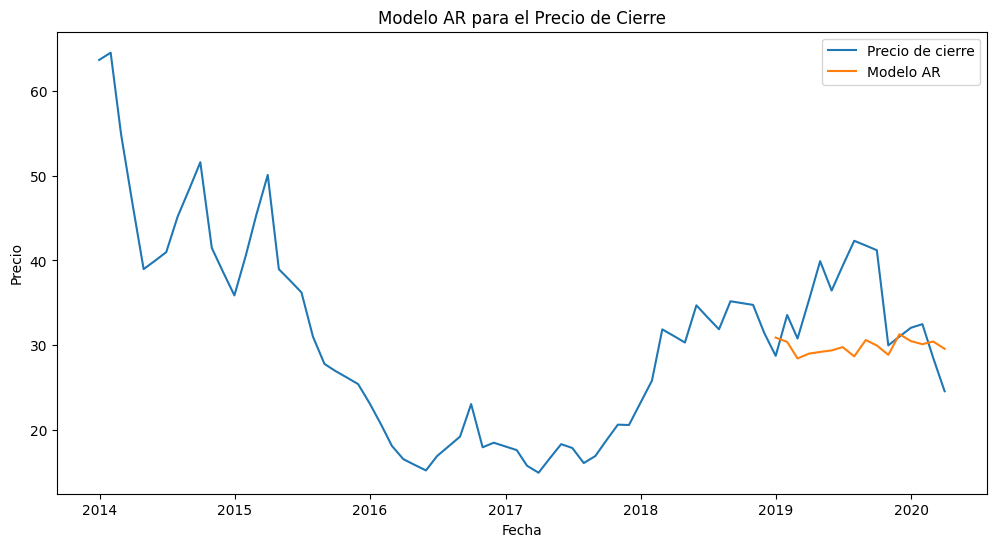

In [92]:
from matplotlib import pyplot as plt

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Precio de cierre')
plt.plot(y_pred, label='Modelo AR')
plt.title('Modelo AR para el Precio de Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()